# Data Cleanup and Feature Selection for Part 2 - Monitor and Improve Existing Agent Performance

In [ ]:
import pandas as pd

#Uncomment in GitHub Repo
train = pd.read_csv('../data/train_storming_round.csv')
test  = pd.read_csv('../data/test_storming_round.csv')
samp  = pd.read_csv('../data/sample_submission_storming_round.csv')

# #Uncomment in Google Colab
# train = pd.read_csv('/content/sample_data/train_storming_round.csv')
# test  = pd.read_csv('/content/sample_data/test_storming_round.csv')
# samp  = pd.read_csv('/content/sample_data/sample_submission_storming_round.csv')

In [2]:
train.head()

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,13,3,10,6,19,20,1957680,562239,19,40


In [3]:
train.shape

(15308, 23)

In [4]:
train.columns

Index(['row_id', 'agent_code', 'agent_age', 'agent_join_month',
       'first_policy_sold_month', 'year_month', 'unique_proposals_last_7_days',
       'unique_proposals_last_15_days', 'unique_proposals_last_21_days',
       'unique_proposal', 'unique_quotations_last_7_days',
       'unique_quotations_last_15_days', 'unique_quotations_last_21_days',
       'unique_quotations', 'unique_customers_last_7_days',
       'unique_customers_last_15_days', 'unique_customers_last_21_days',
       'unique_customers', 'new_policy_count', 'ANBP_value', 'net_income',
       'number_of_policy_holders', 'number_of_cash_payment_policies'],
      dtype='object')

In [5]:
train.dtypes

,0
row_id,int64
agent_code,object
agent_age,int64
agent_join_month,object
first_policy_sold_month,object
year_month,object
unique_proposals_last_7_days,int64
unique_proposals_last_15_days,int64
unique_proposals_last_21_days,int64
unique_proposal,int64


In [6]:
train['target'] = (train['new_policy_count'] > 0).astype(int)

In [7]:
train['agent_join_month'] = pd.to_datetime(train['agent_join_month'], format='%m/%d/%Y')
train['first_policy_sold_month']  = pd.to_datetime(train['first_policy_sold_month'],  format='%m/%d/%Y')
train['year_month'] = pd.to_datetime(train['year_month'], format='%m/%d/%Y')

In [8]:
train.isnull().sum()

,0
row_id,0
agent_code,0
agent_age,0
agent_join_month,0
first_policy_sold_month,0
year_month,0
unique_proposals_last_7_days,0
unique_proposals_last_15_days,0
unique_proposals_last_21_days,0
unique_proposal,0


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = train.select_dtypes(include=numerics).columns
numeric_cols

Index(['row_id', 'agent_age', 'unique_proposals_last_7_days',
       'unique_proposals_last_15_days', 'unique_proposals_last_21_days',
       'unique_proposal', 'unique_quotations_last_7_days',
       'unique_quotations_last_15_days', 'unique_quotations_last_21_days',
       'unique_quotations', 'unique_customers_last_7_days',
       'unique_customers_last_15_days', 'unique_customers_last_21_days',
       'unique_customers', 'new_policy_count', 'ANBP_value', 'net_income',
       'number_of_policy_holders', 'number_of_cash_payment_policies',
       'target'],
      dtype='object')

In [10]:
non_numeric_cols = train.select_dtypes(exclude=numerics).columns
non_numeric_cols

Index(['agent_code', 'agent_join_month', 'first_policy_sold_month',
       'year_month'],
      dtype='object')

In [11]:
train[numeric_cols[1:]].describe()

,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,target
count,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,1.530800e+04,1.530800e+04,15308.000000,15308.000000,15308.000000
mean,40.585772,1.491246,2.991116,10.045728,17.516527,1.989679,2.996538,4.469624,13.922394,2.995493,4.997714,7.500523,15.493729,20.269990,1.025338e+06,2.280414e+05,30.968317,101.180886,0.900052
std,11.688204,1.119554,2.001613,6.037296,6.616954,1.420996,2.004386,2.875329,4.663777,1.644117,2.438918,3.468597,4.542321,9.541693,8.054989e+05,1.736671e+05,24.621933,75.323464,0.299940
min,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.000000,5.000000,12.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,5.000000,12.000000,15.000000,3.473238e+05,9.282500e+04,12.000000,38.000000,1.000000
50%,41.000000,1.000000,3.000000,10.000000,17.000000,2.000000,3.000000,4.000000,14.000000,3.000000,5.000000,8.000000,15.000000,21.000000,9.031445e+05,1.899740e+05,28.000000,90.000000,1.000000
75%,51.000000,2.000000,5.000000,15.000000,23.000000,3.000000,5.000000,7.000000,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.560700e+06,3.217448e+05,48.000000,152.000000,1.000000
max,60.000000,3.000000,6.000000,20.000000,34.000000,4.000000,6.000000,9.000000,32.000000,6.000000,10.000000,15.000000,31.000000,42.000000,3.933840e+06,1.140237e+06,116.000000,378.000000,1.000000


In [12]:
train[non_numeric_cols[1:]].describe()

,agent_join_month,first_policy_sold_month,year_month
count,15308,15308,15308
mean,2021-05-23 01:43:05.941991168,2023-04-24 01:41:52.568591616,2023-11-03 05:31:24.191272704
min,2019-04-01 00:00:00,2022-01-01 00:00:00,2023-01-01 00:00:00
25%,2020-03-01 00:00:00,2022-10-01 00:00:00,2023-06-01 00:00:00
50%,2021-05-01 00:00:00,2023-06-01 00:00:00,2023-11-01 00:00:00
75%,2022-07-01 00:00:00,2023-12-01 00:00:00,2024-04-01 00:00:00
max,2024-07-01 00:00:00,2024-04-01 00:00:00,2024-08-01 00:00:00


During EDA, it was identified that the outliers in numerical columns are not meaningful when comparing with other existing feature behaviours. Therefore we decided to remove the rows with outliers.

So we will follow the same procedure here.

In [13]:
outlier_cols = ['unique_quotations', 'unique_customers', 'ANBP_value', 'net_income', 'number_of_policy_holders', 'number_of_cash_payment_policies']

In [14]:
import pandas as pd

def get_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers, lower, upper

In [15]:
# Remove outlier rows from train_df

for col in outlier_cols:
    outliers, lower, upper = get_outliers_iqr(train, col)
    train = train.drop(outliers.index)

In [16]:
train.columns

Index(['row_id', 'agent_code', 'agent_age', 'agent_join_month',
       'first_policy_sold_month', 'year_month', 'unique_proposals_last_7_days',
       'unique_proposals_last_15_days', 'unique_proposals_last_21_days',
       'unique_proposal', 'unique_quotations_last_7_days',
       'unique_quotations_last_15_days', 'unique_quotations_last_21_days',
       'unique_quotations', 'unique_customers_last_7_days',
       'unique_customers_last_15_days', 'unique_customers_last_21_days',
       'unique_customers', 'new_policy_count', 'ANBP_value', 'net_income',
       'number_of_policy_holders', 'number_of_cash_payment_policies',
       'target'],
      dtype='object')

## Analyze Past & Current Performance Data

Key Performance Indicators:


*   new_policy_count
*   unique_proposal
*   unique_quotations
*   net_income
*   ANBP_value



In [17]:
#Aggregate monthly KPIs per agent

agent_monthly = (
    train
    .groupby(['agent_code', 'year_month'])
    .agg({
        'new_policy_count': 'sum',
        'unique_proposal': 'sum',
        'unique_quotations': 'sum',
        'net_income': 'sum',
        'ANBP_value': 'sum'
    })
    .reset_index()
)

In [18]:
agent_monthly

,agent_code,year_month,new_policy_count,unique_proposal,unique_quotations,net_income,ANBP_value
0,003c1999,2023-01-01,0,8,2,327407,0
1,003c1999,2023-02-01,31,30,14,408662,2408297
2,003c1999,2023-03-01,27,23,19,287226,1901097
3,003c1999,2023-04-01,22,21,19,381203,1635788
4,003c1999,2023-05-01,20,15,14,471548,1876640
...,...,...,...,...,...,...,...
14736,fffb525d,2024-04-01,25,17,17,100780,557100
14737,fffb525d,2024-05-01,29,23,21,316643,1367553
14738,fffb525d,2024-06-01,0,14,12,118609,0
14739,fffb525d,2024-07-01,33,27,22,24775,117810


**The performance during each month by each agent can be observed through the above dataframe**

### Segment Agents into Performance Tiers (High/Medium/Low performers)


**Applying K-means clustering**

Standard scaler has been used here because k-means is a distance based matrix and having zero mean and unit variance is sufficient comoared to using MinMax scaler

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

perf_features = agent_monthly.groupby('agent_code').agg({
    'new_policy_count':'mean',
    'unique_proposal':'mean',
    'unique_quotations':'mean',
    'net_income':'mean',
    'ANBP_value':'mean'
}).reset_index()

scaler = StandardScaler()
X = scaler.fit_transform(perf_features[['new_policy_count', 'unique_proposal', 'unique_quotations', 'net_income','ANBP_value']])

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
perf_features['tier'] = kmeans.labels_

In [22]:
perf_features

,agent_code,new_policy_count,unique_proposal,unique_quotations,net_income,ANBP_value,tier
0,003c1999,21.894737,18.736842,14.631579,282138.421053,1.255974e+06,1
1,00d5bda3,20.250000,19.750000,13.750000,213111.600000,8.855098e+05,2
2,012a3553,17.500000,16.388889,13.444444,184636.333333,8.886144e+05,0
3,012f0e15,19.650000,17.950000,13.800000,225369.700000,8.759131e+05,2
4,0177ed5f,21.250000,16.550000,13.350000,229649.500000,1.067277e+06,2
...,...,...,...,...,...,...,...
900,ff8edcc9,19.722222,17.277778,13.166667,206436.111111,9.117283e+05,2
901,ff955d18,13.000000,22.500000,20.500000,333061.500000,1.160614e+06,1
902,ffca3177,20.052632,16.473684,14.210526,197477.421053,1.114634e+06,2
903,ffe6c9e9,19.550000,16.200000,13.550000,212448.800000,8.356922e+05,2


## Custom Interventions for each performance tier

### High Performers

**Business Context:** Retaining top agents, those with high ANBP, net income, and proposal‐to‐quotation rates, is critical because they contribute disproportionately to revenue and are most at risk of poaching by competitors.

* **Leadership Accelerators:**
  Enroll top performers in a structured leadership development program that teaches strategic account planning and mentorship skills; such programs have been shown to increase retention by providing clear career pathways.
* **Peer Mentoring Roles:**
  Assign them as mentors to Medium performers, which not only leverages their institutional knowledge but also reinforces high achievers’ engagement through teaching.
* **Exclusive Product Previews & Innovation Panels:**
  Give them early access to new offerings in quarterly “innovation councils,” tapping into their high proposal‐to‐quotation rates to refine go-to-market messaging before full launch.
* **Performance-Based Bonus Programs:**
  Implement dynamic SPIFs (Sales Performance Incentive Funds) that align with monthly ANBP targets—automated via incentive-compensation software, to boost motivation and focus on stretch goals.
* **Equity & Recognition Awards:**
  Offer stock grants or non-financial rewards (e.g., extra vacation days, public recognition) tied to hitting top-tier performance brackets, which can improve long-term retention and ownership mindset.


### Medium Performers

**Business Context:** Medium performers often have solid proposal pipelines but conversion or premium values lag, indicating skill gaps in cross-selling, objection handling, and process discipline.

* **Cross-Selling Masterclasses:**
  Host monthly workshops based on the “Solution Affinity Matrix” methodology—shown to boost cross-sell revenue by focusing on complementary offerings—to deepen their ANBP value per customer.
* **Targeted Objection-Handling Coaching:**
  Provide one-on-one role-play sessions with senior sales coaches, leveraging proven high-percentage moves (e.g., diagnosing buyer needs first) to improve close rates.
* **Gamified Incentive Programs:**
  Deploy a leaderboard and badge system that rewards weekly peaks in unique\_quotations\_last\_7\_days and new\_policy\_count, driving friendly competition and real-time feedback—gamification driving up to 48% engagement lift.
* **Weekly “Pit-Stop” Reviews:**
  Conduct 15-minute huddle reviews each Friday to analyze key metrics (proposal\_to\_quotation\_rate, policy\_per\_customer) and set SMART goals for the coming week.
* **Digital Sales Playbooks:**
  Curate micro-learning modules accessible via mobile CRM that prescribe next-best actions based on their past 15- and 21-day activity patterns—accelerating skill adoption.


### Low Performers (“At-Risk” Agents)

**Business Context:** Agents with low new\_policy\_count, minimal proposal activity, or long gaps since first sale are at highest risk of churn and NILL months; early, intensive support can avert lost revenue.

* **Onboarding Refreshers & Bootcamps:**
  Run a tailored 2-week bootcamp covering core sales processes and product knowledge, as lack of knowledge is the top barrier to outreach confidence.
* **Daily Performance Huddles:**
  Institute brief morning stand-ups focused on yesterday’s metrics (unique\_proposals\_last\_7\_days, unique\_customers) to set daily targets and reinforce accountability.
* **One-on-One Coaching Sessions:**
  Schedule bi-weekly mentoring with a senior “performance coach” to diagnose blocker root causes (e.g., CRM under-utilization) and co-create action plans.
* **CRM Usage Workshops:**
  Offer hands-on labs that drive adoption of automated lead-scoring and next-best-action alerts, reducing non-selling admin time (65% of rep time is non-revenue generating).
* **Micro-Incentive Programs:**
  Introduce small, immediate rewards (e.g., gift cards, points) for achieving mini-milestones—such as first quotation or first policy sale in 7 days—to build early momentum.




# Progress Trackers

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Aggregate monthly KPIs per agent
agent_monthly = (
    train
    .groupby(['agent_code','year_month'])
    .agg({
        'new_policy_count':'sum',
        'unique_proposal':'sum',
        'unique_quotations':'sum',
        'net_income':'sum'
    })
    .reset_index()
)

In [24]:
#Compute conversion rate
agent_monthly['prop_to_quot'] = (
    agent_monthly['unique_quotations'] /
    agent_monthly['unique_proposal'].replace(0, pd.NA)
).fillna(0)

In [25]:
#For each month, classify agents into Low/Med/High via KMeans
def assign_tiers(df):
    features = df[['new_policy_count','net_income','prop_to_quot']]
    X = StandardScaler().fit_transform(features)
    kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
    # Map cluster labels to tiers sorted by cluster-center average score
    centers = kmeans.cluster_centers_.mean(axis=1)
    order = centers.argsort()  # lowest=Low, highest=High
    tier_map = {order[0]:'Low', order[1]:'Medium', order[2]:'High'}
    return [tier_map[label] for label in kmeans.labels_]

In [26]:
agent_monthly['tier'] = (
    agent_monthly
    .groupby('year_month')
    .apply(lambda g: pd.Series(assign_tiers(g), index=g.index))
    .reset_index(level=0, drop=True)
)

<ipython-input-26-8540c23a6ebe>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series(assign_tiers(g), index=g.index))


In [27]:
#Pivot into a time series table
progress = agent_monthly.pivot_table(
    index='agent_code',
    columns='year_month',
    values='tier',
    aggfunc='first'
).fillna(method='ffill', axis=1).fillna('Low')

<ipython-input-27-31186ec5fc77>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ).fillna(method='ffill', axis=1).fillna('Low')


In [28]:
progress

year_month,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01
agent_code,,,,,,,,,,,,,,,,,,,,
003c1999,Low,High,High,High,High,Low,Medium,High,Medium,High,Medium,Low,Medium,High,Medium,High,High,Medium,High,High
00d5bda3,High,High,Low,Low,High,Medium,Medium,High,Medium,High,Low,Low,High,Medium,Medium,Medium,Low,Medium,Medium,Low
012a3553,Low,Medium,Low,Low,Medium,Low,Medium,High,Medium,Low,Medium,Medium,Medium,High,Medium,Low,Low,Low,Medium,Medium
012f0e15,High,Medium,High,Medium,Medium,Medium,Low,Low,Medium,Low,Medium,Low,High,Low,Medium,Medium,Medium,Medium,High,High
0177ed5f,Low,High,Low,Low,High,Medium,High,Medium,Medium,Low,Low,High,Medium,Low,High,Medium,High,Low,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff8edcc9,Medium,Low,Low,Low,Medium,Low,Low,Medium,Medium,Low,Medium,Low,Low,High,High,Medium,Medium,Low,Low,Low
ff955d18,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,High,Low
ffca3177,Medium,High,Low,High,Low,Medium,Medium,High,Low,Low,Medium,Low,Medium,Medium,Medium,High,Medium,Low,Medium,High


**This plot indicates each agent's progress during each month**

<ipython-input-29-7f76ed2c9f46>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  progress_num = progress.replace(tier_order)


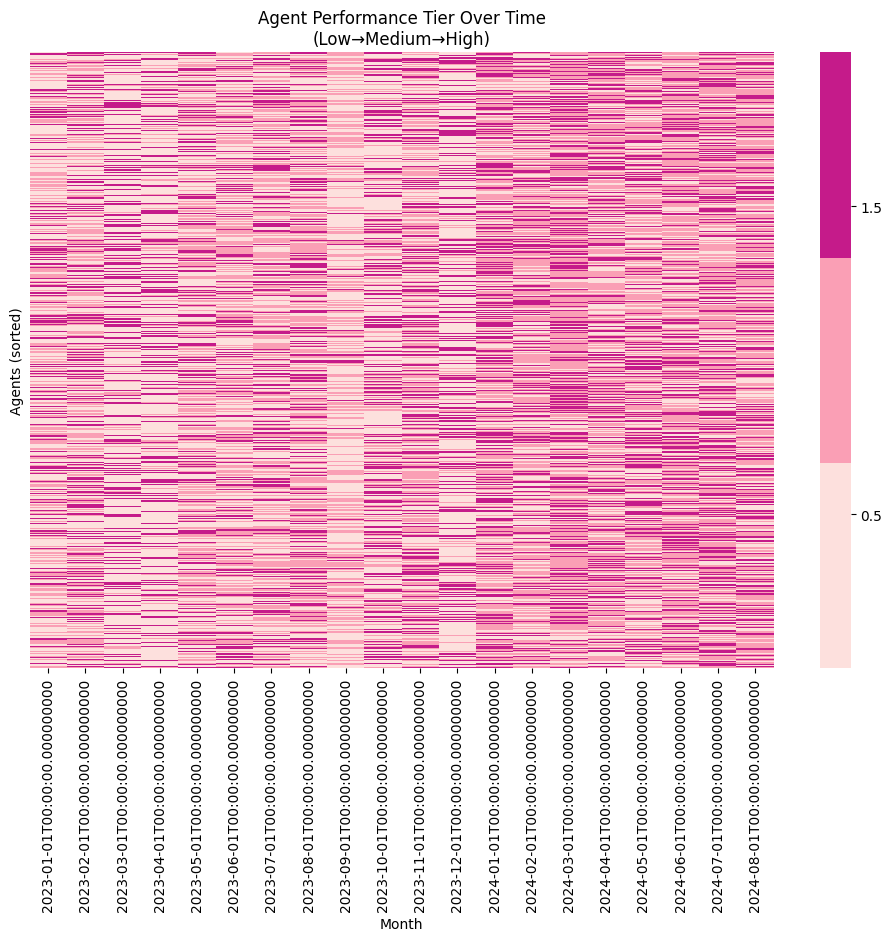

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert tiers to numeric for coloring
tier_order = {'Low':0,'Medium':1,'High':2}
progress_num = progress.replace(tier_order)

plt.figure(figsize=(12,8))
sns.heatmap(progress_num, cmap=['#fde0dd','#fa9fb5','#c51b8a'], cbar_kws={'ticks':[0.5,1.5,2.5]}, yticklabels=False)
plt.title('Agent Performance Tier Over Time\n(Low→Medium→High)')
plt.xlabel('Month')
plt.ylabel('Agents (sorted)')
plt.show()

**Observing this heat map closely will help identify which agents moved up(lighter pink) and which agents moved down overtime(darker pink)**

In [30]:
import plotly.graph_objects as go

# Build Sankey nodes and links
months = sorted(agent_monthly['year_month'].unique().astype(str))
nodes = [f"{m}-{t}" for m in months for t in ['Low','Medium','High']]

# Index mapping
idx = {node:i for i,node in enumerate(nodes)}

# Count transitions
links = {'source':[], 'target':[], 'value':[]}
for i in range(len(months)-1):
    m0, m1 = months[i], months[i+1]
    df0 = agent_monthly[agent_monthly.year_month==m0][['agent_code','tier']]
    df1 = agent_monthly[agent_monthly.year_month==m1][['agent_code','tier']]
    merged = df0.merge(df1, on='agent_code', suffixes=('_0','_1'))
    transitions = merged.groupby(['tier_0','tier_1']).size().reset_index(name='count')
    for _, row in transitions.iterrows():
        links['source'].append(idx[f"{m0}-{row['tier_0']}"])
        links['target'].append(idx[f"{m1}-{row['tier_1']}"])
        links['value'].append(row['count'])

fig = go.Figure(data=[go.Sankey(
    node=dict(label=nodes, pad=15, thickness=20),
    link=links
)])
fig.update_layout(title_text="Agent Tier Transitions Over Time", font_size=10)
fig.show()


**This is an interactive plot which helps to quickly identify how agents shift between tiers with each month**